## Quickstart tensorflow Keras Tutorial (MNIST + A simple-Lenet)
Ref[1]: https://www.tensorflow.org/tutorials/quickstart/beginner <br>
Ref[2]: https://www.tensorflow.org/tutorials/keras/save_and_load <br>
Ref[3]: https://keras.io/api/


In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


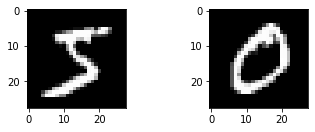

In [3]:
import matplotlib.pyplot as plt
# plot images as gray scale
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
#show the plot

In [4]:
print(x_train.shape, x_test.shape)
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
#Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='sigmoid', use_bias=True, input_shape=(28,28,1)),
    tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=4, padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
  ])


  loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model.compile(optimizer='SGD', #SGD: 0.9254, Adam: 0.94..
              loss=loss_fn,
              metrics=['accuracy'])
  return model

# Create a basic model instance
model = create_model()
model.summary()

#predictions = model(x_train[:1]).numpy()
#tf.nn.softmax(predictions).numpy()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 6, 6, 6)           0         
_________________________________________________________________
flatten (Flatten)            (None, 216)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                2170      
Total params: 2,326
Trainable params: 2,326
Non-trainable params: 0
_________________________________________________________________


In [6]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#loss_fn(y_train[:1], predictions).numpy()

In [7]:
import os.path 

checkpoint_path = "traing_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)
# Train the model wit hthe new callback
model.fit(x_train, y_train, epochs=5, callbacks=[cp_callback]) # Pass callback to training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2003 - accuracy: 0.2622

Epoch 00001: saving model to traing_1/cp.ckpt
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3065 - accuracy: 0.7360

Epoch 00002: saving model to traing_1/cp.ckpt
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7925 - accuracy: 0.8155

Epoch 00003: saving model to traing_1/cp.ckpt
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6280 - accuracy: 0.8396

Epoch 00004: saving model to traing_1/cp.ckpt
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5451 - accuracy: 0.8550

Epoch 00005: saving model to traing_1/cp.ckpt


In [8]:
!ls ./traing_1

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [9]:
model = create_model()
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - loss: 2.4023 - accuracy: 0.0999
Untrained model, accuracy:  9.99%


In [10]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

313/313 - 0s - loss: 0.4865 - accuracy: 0.8721
Restored model, accuracy: 87.21%


For test

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.3196392e-04, 1.3730033e-04, 1.9361952e-04, 3.0865779e-03,
        3.0471725e-04, 5.2913680e-04, 7.6938213e-06, 9.9181420e-01,
        1.6643359e-04, 3.5282683e-03],
       [6.6522635e-03, 4.4148592e-03, 8.0692691e-01, 4.5807246e-02,
        2.9282648e-05, 6.3510120e-02, 3.0010346e-02, 1.4966785e-05,
        4.2508453e-02, 1.2548901e-04],
       [5.6773508e-05, 9.7317040e-01, 4.1866414e-03, 1.9036857e-03,
        1.4302603e-03, 3.9006262e-03, 2.0935223e-03, 1.0606363e-02,
        8.1323204e-04, 1.8385303e-03],
       [9.4436479e-01, 1.9233976e-06, 5.5199680e-03, 4.9507436e-03,
        3.6104224e-04, 1.3335221e-02, 1.9527620e-02, 2.5094028e-03,
        4.1364520e-03, 5.2928436e-03],
       [2.9114692e-03, 8.1282240e-05, 7.2895968e-03, 7.5893407e-04,
        8.8276166e-01, 8.8098953e-03, 1.2779441e-02, 2.8252663e-02,
        1.0768487e-03, 5.5278201e-02]], dtype=float32)>

In [12]:
print(x_train.shape, x_test.shape)
#x_train = x_train[..., tf.newaxis].astype("float32")
#x_test = x_test[..., tf.newaxis].astype("float32")
x_train = x_train[:].reshape(-1, 28, 28)
x_test = x_test[:].reshape(-1, 28, 28) 

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 28, 28) (10000, 28, 28)


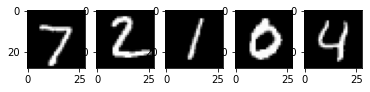

In [13]:
plt.subplot(251)
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.subplot(252)
plt.imshow(x_test[1], cmap=plt.get_cmap('gray'))
plt.subplot(253)
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))
plt.subplot(254)
plt.imshow(x_test[3], cmap=plt.get_cmap('gray'))
plt.subplot(255)
plt.imshow(x_test[4], cmap=plt.get_cmap('gray'))